# Importing necessary libraries

Pandas library  - Fullform of pandas is Panelled Data, it is built on numpy and is useful in storing data as dataframes.
Numpy library - Fullform of numpy is numerical python, many libraries are built on numpy and it is quite crucial in dealing with algebraic and mathematical operations.
Matplotlib - It is similar to matplot and helps in visualization of the data.

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as mp


# Import the data using pandas

In [4]:
headbrain= pd.read_csv('headbrain.csv')

# Check out the shape and few data in the dataset

In [5]:
print("The shape/dimension of the data - ",headbrain.shape)
headbrain.head()

The shape/dimension of the data -  (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Checking the columns

In [6]:
print('Follwing columns are present')
headbrain.columns

Follwing columns are present


Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

### As the dataset is small, we will be using only 1 feature ie Head Size(X) to predict Brain Weight (Y)

In [8]:
X=headbrain['Head Size(cm^3)'].values  #Getting X
Y=headbrain['Brain Weight(grams)'].values #Getting Y

### Let's check for some basic information of the dataset, like the number of nulls, size of dataset

In [18]:
print("Size of Dataset - ",len(X))
print("Null Values in Dataset - \n",headbrain.isnull().sum())
m=len(X)   #length of X samples

Size of Dataset -  237
Null Values in Dataset - 
 Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64


## Plotting the datapoints using matplotlib library

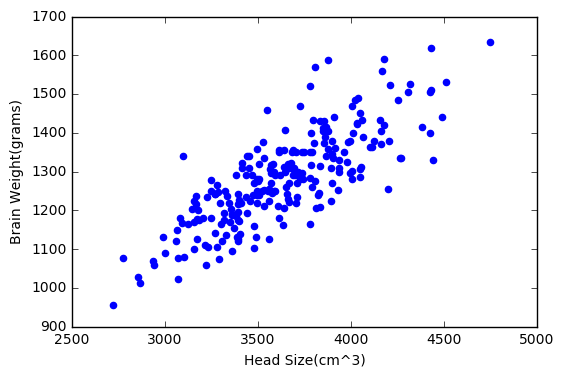

In [21]:
mp.scatter(X,Y,color='blue')
mp.xlabel('Head Size(cm^3)')
mp.ylabel('Brain Weight(grams)')
mp.show()

### Linear regression hypothesis = (h=thetha0 + thetha1 * x) or (y=c+mx)
### We will first calculate the slope - Sum of products / Sum of squares
### Then we will calculate the intercept using Y-mean - (Slope*X-mean)

In [25]:
#Formulating for Linear Regression
#Linear regression hypothesis = (h=thetha0 + thetha1 * x) or (y=c+mx)

mean_X=np.mean(X) #mean of X
mean_Y=np.mean(Y) #mean of Y

#Calculating slope for the line
numer=0
deno=0
for i in range(m):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    deno+=(X[i]-mean_X)**2

    
slope=numer/deno    #slope ie b1 or thetha1 or m

#Calculating intercept for line

intercept=mean_Y-(slope*mean_X)  # intercept ie b0 or c or thetha0


#Display intercept and slope
print(intercept,slope)

325.573421049 0.263429339489


## We will be creating a training set for x and then predict y based on the intercept and slope we calculated.

In [133]:
#generating values for x
max_x=np.max(X)+50
min_x=np.min(X)-50

#Calculatin values of new x (testing set) and y based on testing set of x
x=np.linspace(min_x,max_x,1000)
y=intercept+(slope*x)


## Now we will plot the scatter map and the regression line.

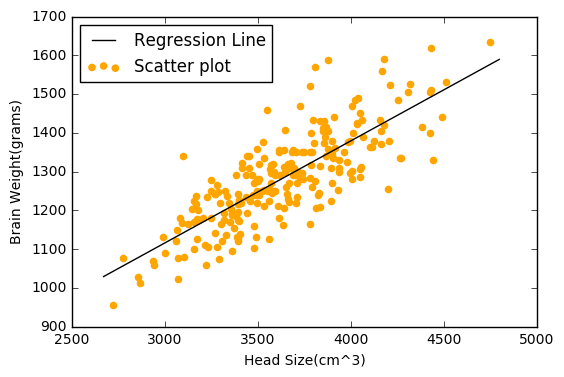

In [144]:
#plotting line and scatter plot
mp.plot(x,y,color='black',label='Regression Line')
mp.scatter(X,Y,color='orange',label='Scatter plot')
mp.xlabel('Head Size(cm^3)')
mp.ylabel('Brain Weight(grams)')
mp.legend(loc=2)
mp.show()

### Calculating the prediction accuracy score using MSE 

In [145]:
#calculating the score of the prediction

ss_r=0
ss_t=0
y_pred_list=[]
for i in range(m):
    y_pred=intercept+(slope*X[i])
    y_pred_list.append(y_pred)
    ss_r+=(Y[i]-y_pred)**2
    ss_t+=(Y[i]-mean_Y)**2
    
r2=1-(ss_r/ss_t) #mean squared error = sum(testing Y- predicted y)^2 / sum(testing Y- mean of testing Y)^2

print(r2)    #mean squared error

0.639311719957


## Plotting Actual vs Predicted Values

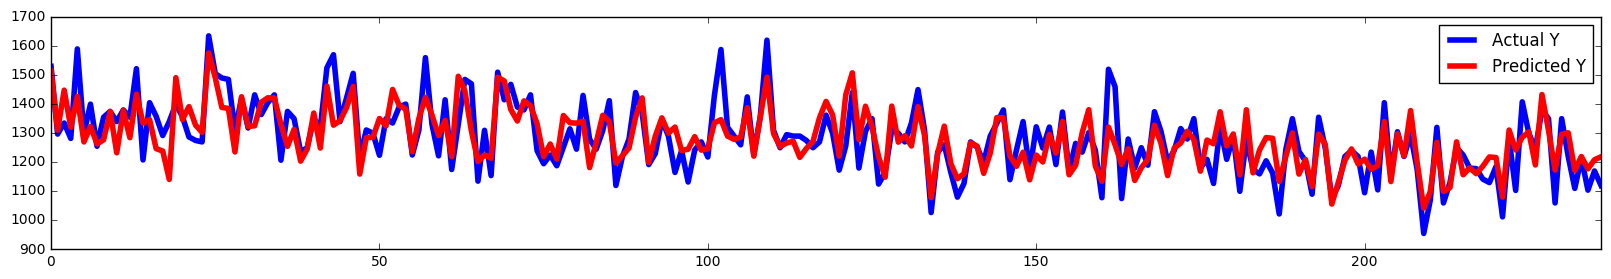

In [157]:
y_pred_list=np.array(y_pred_list)
y_pred_list.reshape(237,1)
ActualvsPredicted=pd.DataFrame(data=Y,columns=['Actual Y'])
ActualvsPredicted['Predicted Y']=y_pred_list

%matplotlib inline

ActualvsPredicted.plot.line(figsize=(20,3),cmap='bwr',lw='4')